In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn --quiet


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset (comes built-in with seaborn)
tips = sns.load_dataset("tips")

# Basic info
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# Add new columns
tips['tip_pct'] = (tips['tip'] / tips['total_bill']) * 100
tips['total_paid'] = tips['total_bill'] + tips['tip']

# Check for missing values
tips.isna().sum()


,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0
tip_pct,0
total_paid,0


In [4]:
agg = tips.groupby(['day','time']).agg(
    transactions=('total_bill','count'),
    avg_bill=('total_bill','mean'),
    avg_tip_pct=('tip_pct','mean'),
    total_revenue=('total_paid','sum')
).reset_index()

agg


/tmp/ipython-input-4294290024.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = tips.groupby(['day','time']).agg(


,day,time,transactions,avg_bill,avg_tip_pct,total_revenue
0,Thur,Lunch,61,17.664754,16.130074,1246.38
1,Thur,Dinner,1,18.780000,15.974441,21.78
2,Fri,Lunch,7,12.845714,18.876489,106.60
3,Fri,Dinner,12,19.663333,15.891611,271.24
4,Sat,Lunch,0,NaN,NaN,0.00
5,Sat,Dinner,87,20.441379,15.315172,2038.80
6,Sun,Lunch,0,NaN,NaN,0.00
7,Sun,Dinner,76,21.410000,16.689729,1874.55


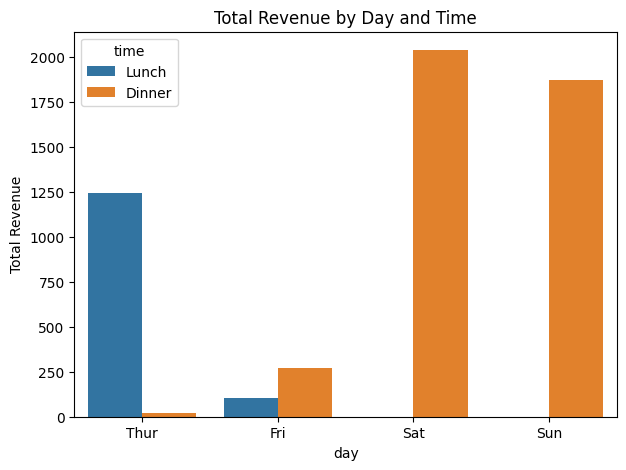

In [5]:
plt.figure(figsize=(7,5))
sns.barplot(data=agg, x='day', y='total_revenue', hue='time')
plt.title('Total Revenue by Day and Time')
plt.ylabel('Total Revenue')
plt.show()


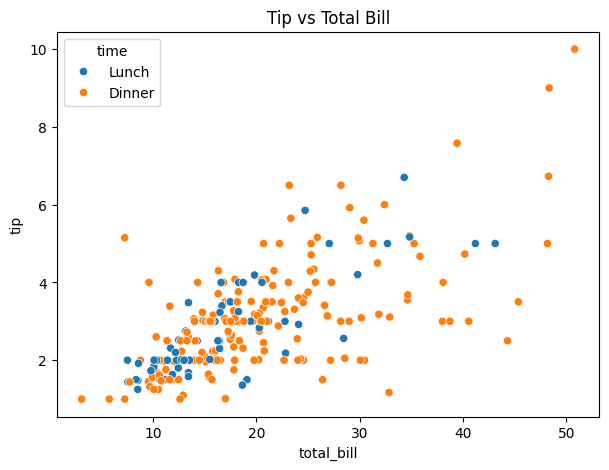

In [6]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')
plt.title('Tip vs Total Bill')
plt.show()


In [7]:
X = tips[['total_bill']]
y = tips['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print(f"MSE = {mse:.3f}, R2 = {r2:.3f}")


Coefficient: 0.10941450882568869
Intercept: 0.8615983766707909
MSE = 0.745, R2 = 0.440


In [8]:
# Save files to show in GitHub later
agg.to_csv("tips_daily_summary.csv", index=False)
pd.DataFrame({
    'total_bill': X_test.values.flatten(),
    'actual_tip': y_test,
    'predicted_tip': np.round(y_pred,2)
}).to_csv("tip_predictions_sample.csv", index=False)

from google.colab import files
files.download("tips_daily_summary.csv")
files.download("tip_predictions_sample.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
print(f"""
Project Summary:
• Dataset: Seaborn 'tips' (restaurant bills)
• Created features: tip_pct, total_paid
• Aggregated revenue by day & time
• Built simple Linear Regression (tip ~ total_bill)
• Model R² score: {r2:.3f}
• Outputs: 2 charts, 2 CSVs
""")



Project Summary:
• Dataset: Seaborn 'tips' (restaurant bills)
• Created features: tip_pct, total_paid
• Aggregated revenue by day & time
• Built simple Linear Regression (tip ~ total_bill)
• Model R² score: 0.440
• Outputs: 2 charts, 2 CSVs

